In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
df_main = pd.read_csv('../data/raw/sales_data.csv')
df = df_main.copy()
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [27]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [28]:
df[df.duplicated()]

,id,date,store_nbr,family,sales,onpromotion


In [29]:
df_host=df.groupby(['store_nbr','family'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)
print(df_host)

      store_nbr     family         sales
1431         44  GROCERY I  1.638606e+07
1464         45  GROCERY I  1.634975e+07
1530         47  GROCERY I  1.551453e+07
1497         46  GROCERY I  1.434226e+07
1422         44  BEVERAGES  1.341786e+07
78            3  GROCERY I  1.297047e+07
1563         48  GROCERY I  1.283099e+07
1455         45  BEVERAGES  1.137035e+07
69            3  BEVERAGES  1.135159e+07
1596         49  GROCERY I  1.108798e+07


Sales each day

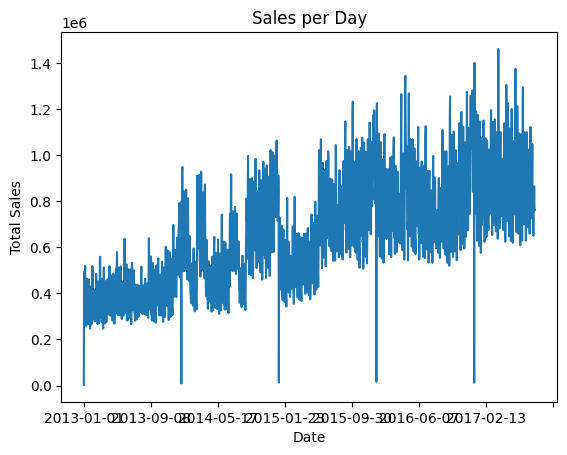

In [30]:
daily_sales = df.groupby('date')['sales'].sum()

plt.figure()
daily_sales.plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales per Day')
plt.show()

Sales each family

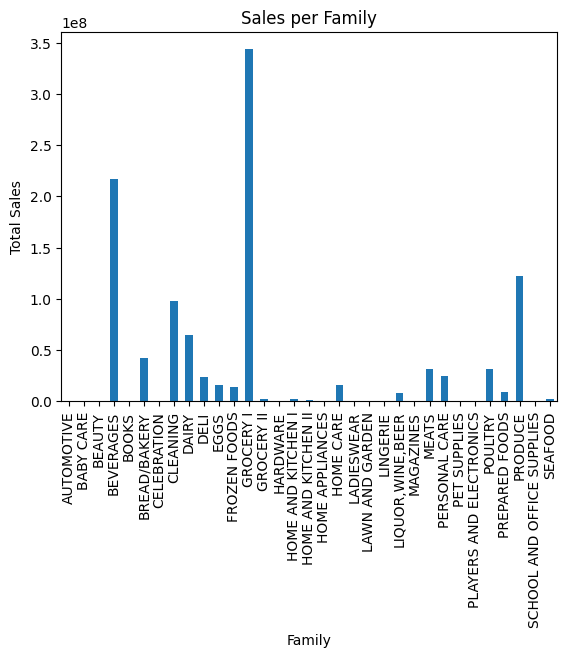

In [31]:
family_sales = df.groupby('family')['sales'].sum()

plt.figure()
family_sales.plot(kind='bar')
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Sales per Family')
plt.show()


Promotion each family

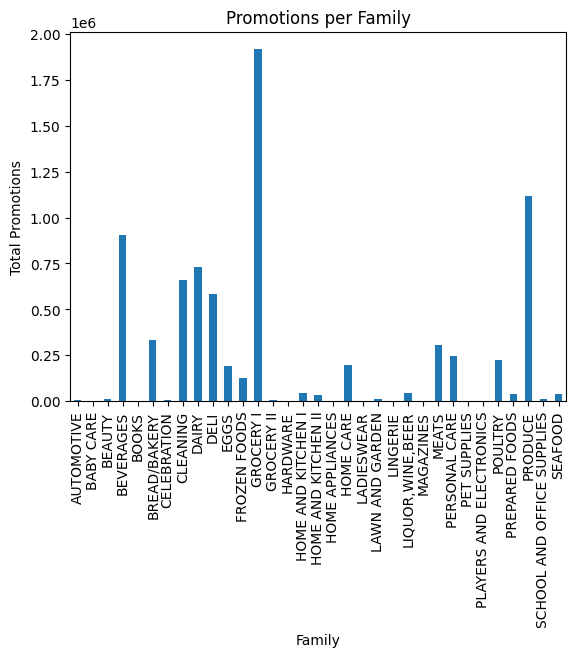

In [32]:
family_promo = df.groupby('family')['onpromotion'].sum()

plt.figure()
family_promo.plot(kind='bar')
plt.xlabel('Family')
plt.ylabel('Total Promotions')
plt.title('Promotions per Family')
plt.show()


Promotion each day

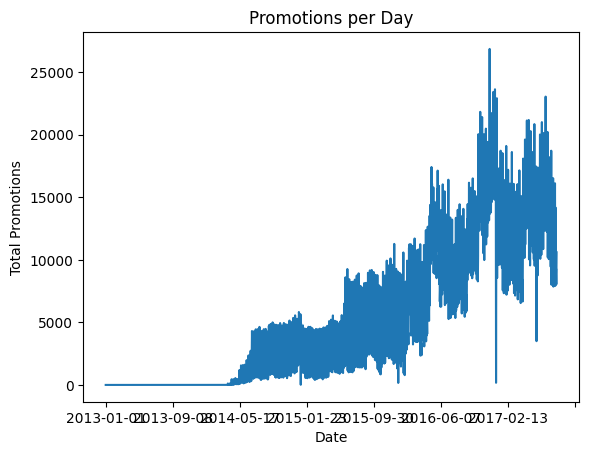

In [33]:
daily_promo = df.groupby('date')['onpromotion'].sum()

plt.figure()
daily_promo.plot()
plt.xlabel('Date')
plt.ylabel('Total Promotions')
plt.title('Promotions per Day')
plt.show()

. Day-of-Week Sales Pattern
. Promotion Impact on Sales

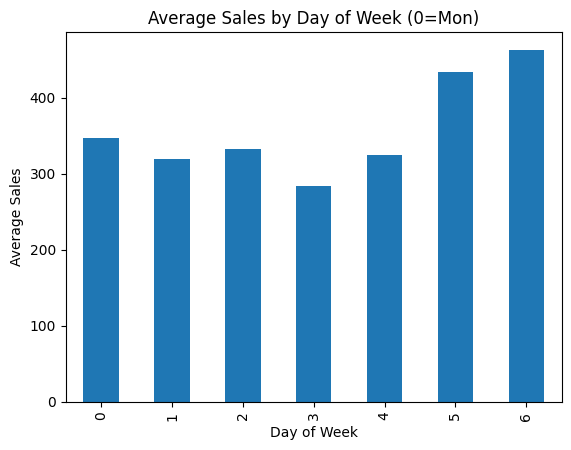

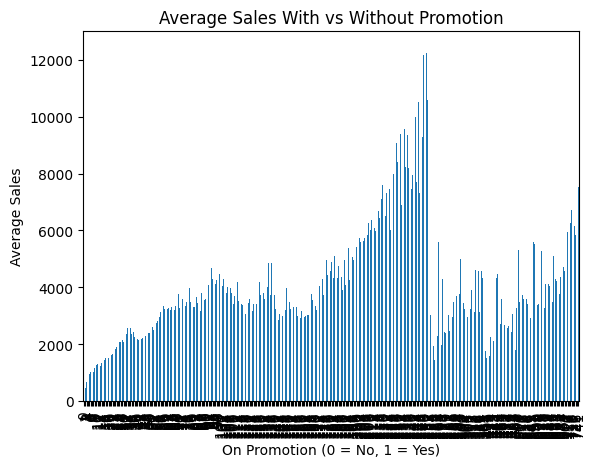

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df['date'] = pd.to_datetime(df['date'])

# -----------------------------
# Day-of-Week Sales Pattern
# -----------------------------
df['day_of_week'] = df['date'].dt.dayofweek
dow_sales = df.groupby('day_of_week')['sales'].mean()

plt.figure()
dow_sales.plot(kind='bar')
plt.title('Average Sales by Day of Week (0=Mon)')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()

# -----------------------------
# Promotion Impact on Sales
# -----------------------------
promo_impact = df.groupby('onpromotion')['sales'].mean()

plt.figure()
promo_impact.plot(kind='bar')
plt.title('Average Sales With vs Without Promotion')
plt.xlabel('On Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.show()
